In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'

## Remineralization 
datadir_remin = 'ocean_cobalt_omip_rates_year_z/ts/annual/5yr/'
filename_remin = 'ocean_cobalt_omip_rates_year_z.0846-0850.remoc.nc'

##Primary production

datadir_pp = 'ocean_cobalt_omip_rates_year_z/ts/annual/5yr/'
filename_pp = 'ocean_cobalt_omip_rates_year_z.0846-0850.pp.nc'

## Volume and temperature

filename_vol = 'ocean_cobalt_omip_rates_year_z.0846-0850.volcello.nc'

datadir_temp = 'ocean_annual_z/ts/annual/5yr/'
filename_temp = 'ocean_annual_z.0846-0850.thetao.nc'


In [4]:
remin = xr.open_dataset(rootdir+datadir_remin+filename_remin)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [5]:
pp = xr.open_dataset(rootdir+datadir_pp+filename_pp)
vol = xr.open_dataset(rootdir+datadir_pp+filename_vol)
temp = xr.open_dataset(rootdir+datadir_temp+filename_temp)


In [6]:
de = xr.merge([remin, pp, vol, temp])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/pyt

In [7]:
remin_mol = de.remoc * de.volcello
remin_mol.name = 'remin_mol'
de = xr.merge([de, remin_mol])

pp_mol = de.pp * de.volcello
pp_mol.name = 'pp_mol'
de = xr.merge([de, pp_mol])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


NameError: name 'colorbar' is not defined

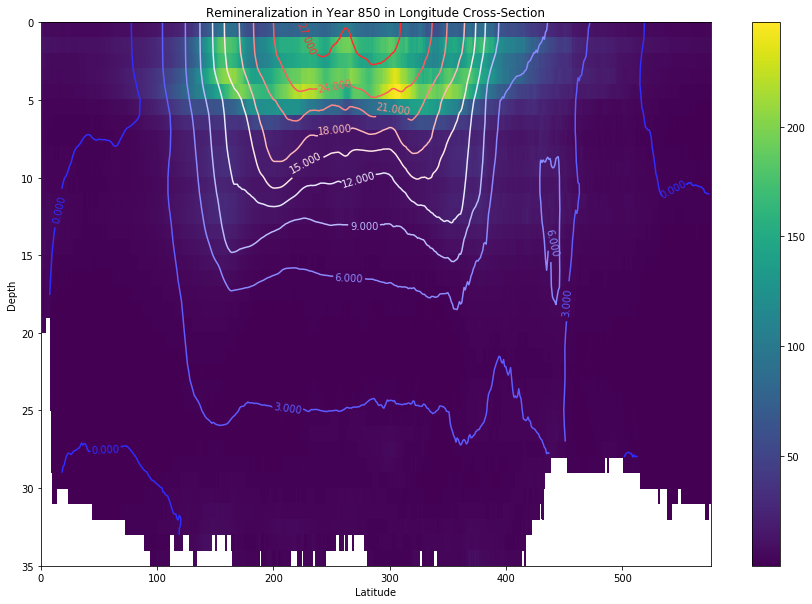

In [13]:
##Remineralization!!!

#Remember that units are moles per second!

crosslong = np.zeros((35, 576))
crosstemp = np.zeros((35, 576))
for j in range(0, 35):
    for k in range(0, 576):
        remin_in_theta = np.nanmean(de.remin_mol.isel(time = 4, z_l = j, yh = k))
        avgtemp = np.nanmean(de.thetao.isel(time = 4, z_l =j, yh = k))
        crosslong[j][k] = remin_in_theta
        crosstemp[j][k] = avgtemp
plt.figure(figsize = (15,10)) # Changes figure size, easier to visualize data
im = plt.pcolormesh(crosslong)
# im.set_clim([0, 0.05])
a = plt.contour(crosstemp, 10, cmap = plt.cm.bwr)
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.title('Remineralization in Year 850 in Longitude Cross-Section')
plt.xlabel('Latitude')
plt.ylabel('Depth')
#colorbar.set_label('Rate of Remineralization (moles per second)', rotation=270)
plt.show()

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


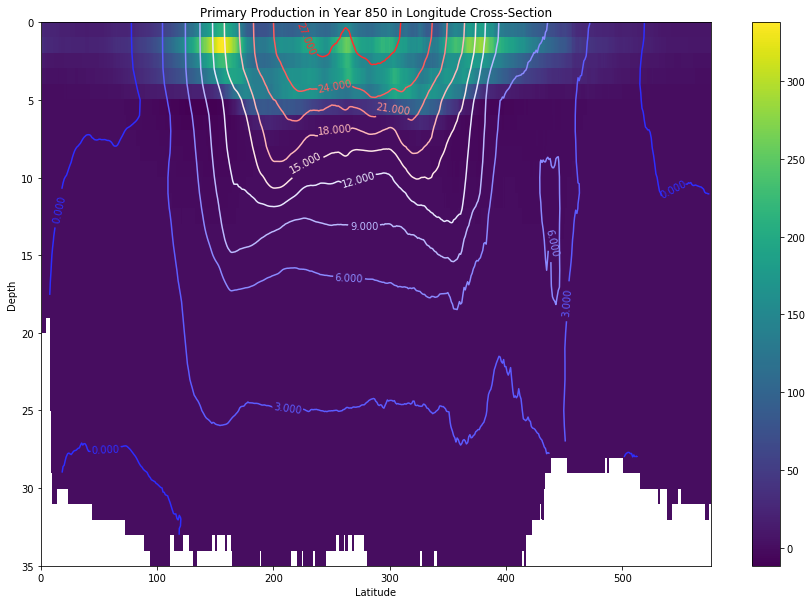

In [14]:
## Primary Production!!

crosslong = np.zeros((35, 576))
crosstemp = np.zeros((35, 576))
for j in range(0, 35):
    for k in range(0, 576):
        pp_in_theta = np.nanmean(de.pp_mol.isel(time = 4, z_l = j, yh = k))
        avgtemp = np.nanmean(de.thetao.isel(time = 4, z_l =j, yh = k))
        crosslong[j][k] = pp_in_theta
        crosstemp[j][k] = avgtemp
plt.figure(figsize = (15,10)) # Changes figure size, easier to visualize data
im = plt.pcolormesh(crosslong)
# im.set_clim([0, 0.05])
a = plt.contour(crosstemp, 10, cmap = plt.cm.bwr)
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.title('Primary Production in Year 850 in Longitude Cross-Section')
plt.xlabel('Latitude')
plt.ylabel('Depth')
#colorbar.set_label('Rate of Primary Production (moles per second)', rotation=270)
plt.show()